In [1]:
import os
import pandas as pd

allcards = pd.read_json('AllCards.json')

MedianCMC Max:  4.0 Min:  1.0


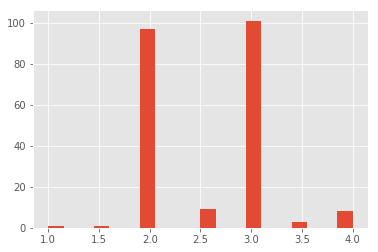

ToughnessToCMC Max:  1.0938 Min:  0.4483


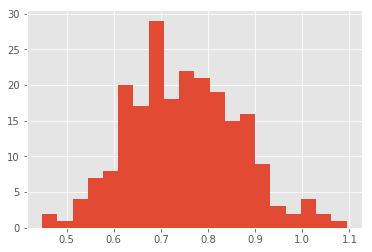

PowerToCMC Max:  1.129 Min:  0.3684


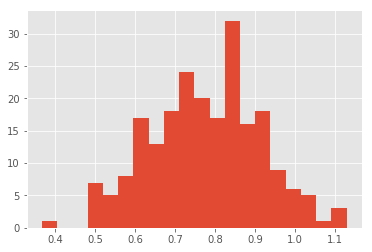

PowerToToughness Max:  1.7273 Min:  0.5833


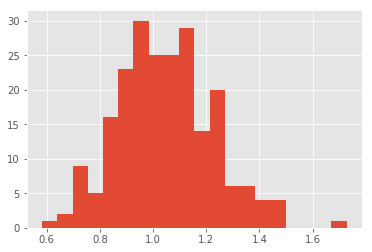

CreatureDensity Max:  0.88 Min:  0.1304


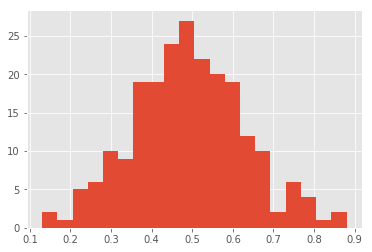

AverageCMCCreatures Max:  7.0 Min:  2.0769


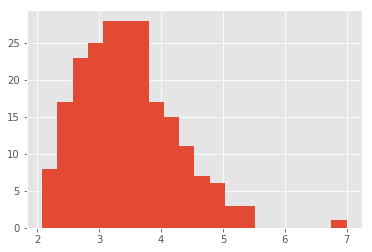

AverageToughness Max:  7.0 Min:  1.4286


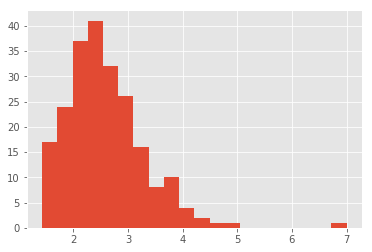

AveragePower Max:  6.0 Min:  1.5


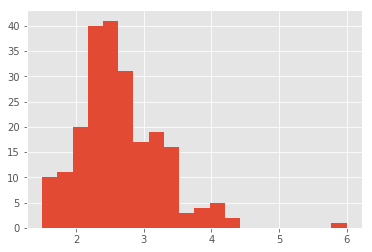

AverageCMC Max:  4.4545 Min:  2.0


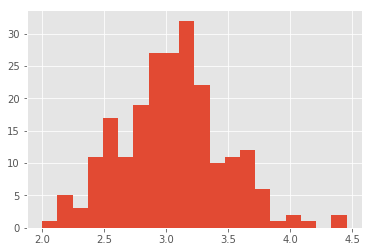

MaxCMC Max:  13 Min:  5


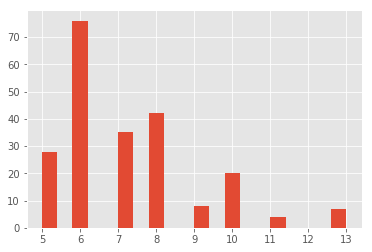

NumberOfCreatures Max:  22 Min:  3


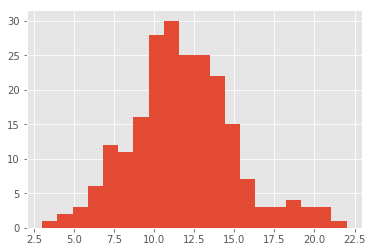

In [57]:
import numpy as np
import matplotlib.pyplot as plt

decklists_path = 'data/decks/'

class ArchetypeWorkshop():
        def __init__(self):
            self.deckfiles = []
            self.loadAllDeckFilenames()
            self.decks = []
            self.loadAllDecks()
            self.cards = []
            self.loadAllUsedCards()
            self.used_cards = []
            self.loadAllUsedCardsData()
            self.allcards =  allcards#[]
            #self.loadAllCardsData()
            self.deck_and_name=[]
            
        def loadAllDeckFilenames(self):
            if len(self.deckfiles) == 0:
                tmp = os.listdir(decklists_path)
                deckfiles = []
                for i in tmp:
                    deckfiles.append(i.replace('~', ''))
                self.deckfiles = list(set(deckfiles))
                
        def loadDecks(self, filename):
            data = pd.read_json('data/decks/'+filename)
            return data['cards']
    
        def loadAllDecks(self):
            self.loadAllDeckFilenames()
            for i in self.deckfiles:
                tmp_decks = self.loadDecks(i)
                for d in tmp_decks:
                    self.decks.append(d)
    
        def loadAllUsedCards(self):
            if len(self.cards) == 0:
                self.loadAllDecks()
                for i in self.decks:
                    for j in i:
                        if "(ORI)" not in j:
                            self.cards.append(j)
                self.cards = sorted(list(set(self.cards)))
                
        def loadAllCardsData(self):
            if os.path.isfile('AllCards.json') == False:
                self.downloadAllCardsData()
            if len(self.allcards) == 0:
                self.allcards = pd.read_json('AllCards.json')
                
        def loadAllUsedCardsData(self):
            self.used_cards = pd.read_json('used_cards.json')
                
        def prepareAllUsedCardsData(self):
            used_cards = []
            for i in self.cards:
                used_cards.append(self.allcards[i])
            self.used_cards = used_cards
            
        def saveUsedCardsAsJson(self):
            df = pd.DataFrame(self.used_cards)
            df.to_json('used_cards.json')
            
            
        # actual archetype detection methods start here
        
        def loadDecksWithNames(self, filename):
            data = pd.read_json('data/decks/'+filename)
            return data['cards'], data['name']
        
        def loadAllDecksWithNames(self):
            self.loadAllDeckFilenames()
            for i in self.deckfiles:
                tmp_decks, tmp_names = self.loadDecksWithNames(i)
                for i in range(0, len(tmp_decks)):
                    self.deck_and_name.append((tmp_decks[i], tmp_names[i]))
                    
        def loadDeckWithAllInfo(self, filename):
            data = pd.read_json('data/decks/'+filename)
            return data['cards'], data['name'], data['player'], data['draft']
        
        def loadAllDecksWithAll(self):
            self.loadAllDeckFilenames()
            for i in self.deckfiles:
                tmp_decks, tmp_names, tmp_players, tmp_drafts = self.loadDeckWithAllInfo(i)
                for i in range(0, len(tmp_decks)):
                    self.deck_and_name.append([tmp_decks[i], tmp_names[i], tmp_players[i], tmp_drafts[i]])
                    
        def showCardTypes(self, deck):
            for i in deck:
                print self.allcards[i]['types']
                
        def getNonlandsOnly(self, deck):
            nonlands = []
            for i in deck:
                if 'Land' not in self.allcards[i]['types']:
                    nonlands.append(i)
            return nonlands
        
        def getNumberOfCardType(self, deck, cardtype):
            acc = 0
            for i in deck:
                if cardtype in self.allcards[i]['types']:
                    acc+=1
            return acc
        
        def getAverageCMC(self, deck):
            acc = 0
            for i in deck:
                acc+=self.allcards[i]['cmc']
                
            return round((acc+0.0)/len(deck), 4)
        
        def getAverageCMCForType(self, deck, cardtype):
            acc = 0
            counter = 0
            for i in deck:
                if cardtype in self.allcards[i]['types']:
                    acc+=self.allcards[i]['cmc']
                    counter+=1
            return round((acc+0.0)/counter, 4)
        
        def getMinMaxMedian(self, deck):
            cmcs = []
            for i in deck:
                cmcs.append(self.allcards[i]['cmc'])
                
            npcmcs = np.array(cmcs)
            return {
                'min': np.min(npcmcs),
                'max': np.max(npcmcs),
                'median': np.median(npcmcs)
            }
        
        def getAveragePowerToughness(self, deck):
            total_power = 0
            total_tough = 0
            total_cmc=0
            number = self.getNumberOfCardType(deck, 'Creature')
            for i in deck:
                if 'Creature' in self.allcards[i]['types']:
                    if self.allcards[i]['power'] not in ['X', '*']:
                        total_power += int(self.allcards[i]['power'])
                    if self.allcards[i]['toughness'] not in ['X', '*']:
                        total_tough += int(self.allcards[i]['toughness'])
                    total_cmc+=int(self.allcards[i]['cmc'])
            return {
                'ave_power': round((total_power+0.0)/number, 4),
                'ave_tough': round((total_tough+0.0)/number, 4),
                'total_power': total_power,
                'total_tough': total_tough,
                'power_cmc': round(total_power/(0.0+total_cmc), 4),
                'tough_cmc': round(total_tough/(0.0+total_cmc), 4)
            }
            
        def examineDeck(self, i):
            deck = self.deck_and_name[i][0]
            nonlands = self.getNonlandsOnly(deck)
            deck_name = self.deck_and_name[i][1]
            player_name = self.deck_and_name[i][2]
            draft_num = self.deck_and_name[i][3]
            tmp = deck_name.split(' ')
            simple_name = tmp[1]
            
            
            min_max_median = self.getMinMaxMedian(deck)
            average_power_toughness = self.getAveragePowerToughness(nonlands)
            creature_density = round(self.getNumberOfCardType(nonlands, 'Creature')/(0.0 + len(nonlands)), 4)
            power_to_toughness = round(average_power_toughness['total_power']/(0.0+average_power_toughness['total_tough']), 4)
                        
            return {
                'Name': simple_name,
                'NumberOfCreatures': self.getNumberOfCardType(nonlands, 'Creature'),
                #'NumberOfEquipments': self.getNumberOfCardSubtype(nonlands, 'Equipped'),
                'AverageCMC': self.getAverageCMC(nonlands),
                'AverageCMCCreatures': self.getAverageCMCForType(deck, 'Creature'),
                'CreatureDensity': creature_density,
                'PowerToToughness':power_to_toughness,
                'PowerToCMC': average_power_toughness['power_cmc'],
                'ToughnessToCMC': average_power_toughness['tough_cmc'],
                'MaxCMC': min_max_median['max'],
                'MedianCMC': min_max_median['median'],
                'AveragePower': average_power_toughness['ave_power'],
                'AverageToughness': average_power_toughness['ave_tough'],
                'Player and draft':player_name+'_'+draft_num
            }
        
        def examineAllDecks(self):
            self.results_all_decks = []
            for i in range(len(self.deck_and_name)):
                self.results_all_decks.append(self.examineDeck(i))
                
        def convertResultsToDataFrame(self):
            my_keys = self.results_all_decks[0].keys()
            pre_df = {}
            for i in my_keys:
                pre_df[i] = []
            
            for i in self.results_all_decks:
                for j in my_keys:
                    pre_df[j].append(i[j])
            
            self.df = pd.DataFrame.from_dict(pre_df)
                        
            for i in my_keys:
                if i not in ['Name', 'Player and draft']:
                    print i,'Max: ', max(pre_df[i]), 'Min: ', min(pre_df[i])
                    hist = self.df[i].hist(bins = 20)
                    plt.style.use('ggplot')
                    plt.show()
                    
                
                
                
                
workshop = ArchetypeWorkshop()
#workshop.loadAllCardsData()

#workshop.prepareAllUsedCardsData()
#workshop.saveUsedCardsAsJson()

# normalize with using min and max values
# find most similar decks
# look at given names

workshop.loadAllDecksWithAll()

workshop.examineAllDecks()

# Convert input data to the Data Frame

workshop.convertResultsToDataFrame()

# Visualise data from data frame



# Normalize data from data frame

